In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import quad
import scipy.linalg as la
import networkx as nx
import seaborn as sns
import pandas as pd
import graphs as g
import random, time
from scipy.interpolate import interp1d

# seed = 1992
# random.seed(seed)
# np.random.seed(seed)

In [2]:
def cdf_ind(sorted_norm_vec):
    cdf_distance = []
    for idx, sorted_elt in enumerate(sorted_norm_vec):
        cdf_distance.append(len(sorted_norm_vec[sorted_norm_vec <= sorted_elt])/len(sorted_norm_vec))
    return(cdf_distance)

In [3]:
def f(x):
    return abs(f1(x)-f2(x))

In [4]:
#2D Grid Graph
grid_graph = nx.grid_2d_graph(5,5)

#Dolphins Graph
dolphins_graph = nx.read_gml("00-graphs/dolphins.gml")

#Davis Southern women social network
Davis_Southern_graph=nx.davis_southern_women_graph()

#Florentine families graph
florentine_families_graph=nx.florentine_families_graph()

#Karate graph
Zachary_graph=nx.karate_club_graph()

#Taro Graph
taro_graph = g.taro_graph()

In [5]:
# 2D Grid

A_2Dgrid = (nx.adjacency_matrix(grid_graph)).todense()
D_2Dgrid = np.diag(np.asarray(sum(A_2Dgrid))[0]) 

eigenvalues_2Dgrid, eigenvectors_2Dgrid = la.eig(D_2Dgrid - A_2Dgrid)

r_eigenv_2Dgrid = sorted(zip(eigenvalues_2Dgrid.real, eigenvectors_2Dgrid.T), key=lambda x: x[0])


# Dolphins

A_Dol = (nx.adjacency_matrix(dolphins_graph)).todense()
D_Dol = np.diag(np.asarray(sum(A_Dol))[0]) 

eigenvalues_Dol, eigenvectors_Dol = la.eig(D_Dol - A_Dol)

r_eigenv_Dol = sorted(zip(eigenvalues_Dol.real,
                          eigenvectors_Dol.T), key=lambda x: x[0])

# Taro

A_taro = (nx.adjacency_matrix(taro_graph)).todense()
D_taro = np.diag(np.asarray(sum(A_taro))[0]) 

eigenvalues_taro, eigenvectors_taro = la.eig(D_taro - A_taro)
r_eigenv_taro = sorted(zip(eigenvalues_taro.real,
                           eigenvectors_taro.T), key=lambda x: x[0])

# Zachary

A_Zachary = (nx.adjacency_matrix(Zachary_graph)).todense()
D_Zachary = np.diag(np.asarray(sum(A_Zachary))[0]) 

eigenvalues_Zachary, eigenvectors_Zachary = la.eig(D_Zachary - A_Zachary)
r_eigenv_Zachary = sorted(zip(eigenvalues_Zachary.real,
                              eigenvectors_Zachary.T), key=lambda x: x[0])


# A Davis

A_Davis = (nx.adjacency_matrix(Davis_Southern_graph)).todense()
D_Davis = np.diag(np.asarray(sum(A_Davis))[0]) 

eigenvalues_Davis, eigenvectors_Davis = la.eig(D_Davis - A_Davis)
r_eigenv_Davis = sorted(zip(eigenvalues_Davis.real,
                          eigenvectors_Davis.T), key=lambda x: x[0])

# Florentine Families

A_florentine = (nx.adjacency_matrix(florentine_families_graph)).todense()
D_florentine = np.diag(np.asarray(sum(A_florentine))[0]) 

eigenvalues_florentine, eigenvectors_florentine = la.eig(D_florentine - A_florentine)
r_eigenv_florentine = sorted(zip(eigenvalues_florentine.real,
                          eigenvectors_florentine.T), key=lambda x: x[0])

In [6]:
graphs_list = [grid_graph, dolphins_graph, taro_graph,
               Zachary_graph, Davis_Southern_graph, 
               florentine_families_graph]

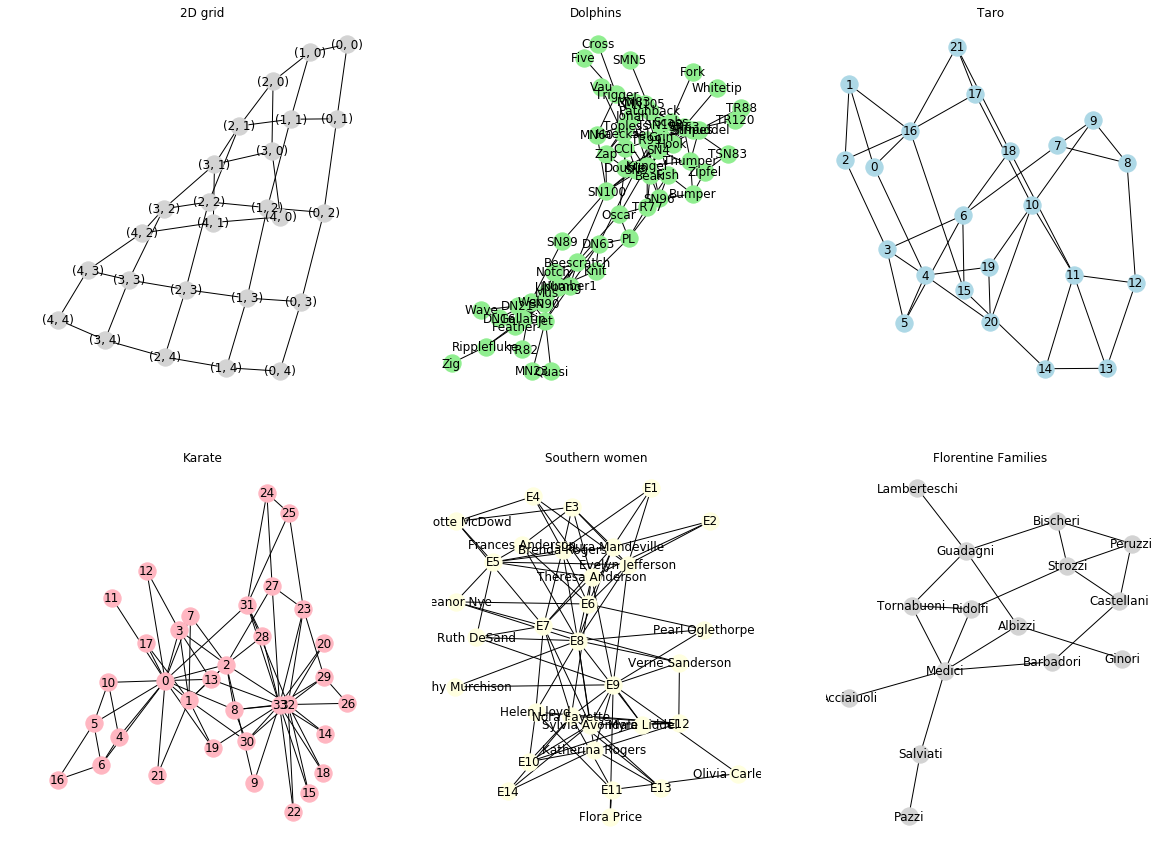

In [7]:
g.savage_plot(graphs_list)

In [8]:
v_ri = g.normalize_eigenv(sorted(r_eigenv_Zachary[1][1], key=lambda x: x))
v_rj = g.normalize_eigenv(sorted(r_eigenv_Davis[1][1], key=lambda x: x))

cdf_zac_i = cdf_ind(v_ri)
cdf_taro_j = cdf_ind(v_rj)

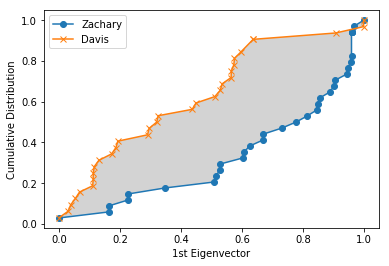

In [10]:
plt.plot(v_ri ,cdf_zac_i, '-o',label='Zachary')
plt.plot(v_rj ,cdf_taro_j, '-x',label='Davis')
plt.fill(np.append(v_ri, v_rj[::-1]), np.append(cdf_zac_i, cdf_taro_j[::-1]), 'lightgrey')
plt.xlabel("1st Eigenvector")
plt.ylabel("Cumulative Distribution")
plt.legend(loc='upper left')
plt.show()

In [105]:

f1 = interp1d(v_ri ,cdf_zac_i)
f2 = interp1d(v_rj ,cdf_taro_i)

quad(f, 0., 1.,  epsabs = 1e-4, limit = 2000)[0]

0.3192704461983093

In [8]:
reign_lists = [r_eigenv_2Dgrid, r_eigenv_Dol, r_eigenv_taro,
               r_eigenv_Zachary, r_eigenv_Davis, r_eigenv_florentine]

In [9]:
kruglov_dist_matrix = g.sgd_matrix(reign_lists)

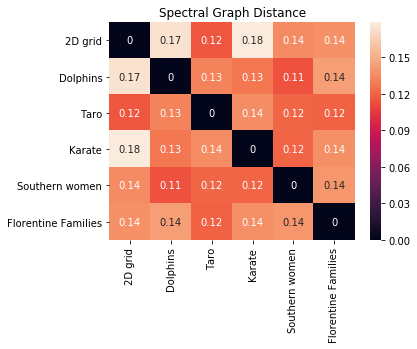

In [10]:
graphs_names = ["2D grid", "Dolphins", "Taro", "Karate",
                "Southern women", "Florentine Families"]

plt.figure(figsize=(5.5,4))
sns.heatmap(pd.DataFrame(kruglov_dist_matrix,
                         index = graphs_names, 
                         columns = graphs_names),
            annot=True)
plt.title('Spectral Graph Distance')
plt.show()

## Watts–Strogatz (WS) models:

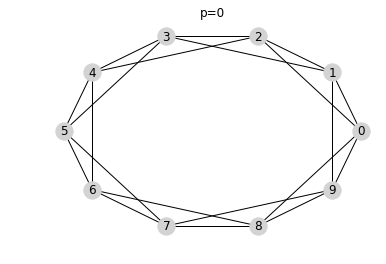

In [11]:
G=nx.watts_strogatz_graph(10, 4, 0, seed=1991)
pos = nx.circular_layout(G) 
nx.draw_networkx(G,pos, node_color='lightgrey')
plt.title('p=0')
plt.axis('off')
#plt.savefig("p0")
plt.show()

In [12]:
p=np.round(np.linspace(0.02,1, num=25),2)
n=300
k=6
p0_graph = nx.watts_strogatz_graph(n=n, k=6, p=0.1, seed=123)
A_p0 = (nx.adjacency_matrix(p0_graph)).todense()
D = np.diag(np.asarray(sum(A_p0))[0])
eigenvalues, eigenvectors = la.eig(D - A_p0)
r_eigenv_p0 = sorted(zip(eigenvalues.real, eigenvectors.T), key=lambda x: x[0])

In [13]:
tic = time.time() 
N_graphs = len(p)
replicates = 50
A_dics = {}
watts_strogatz_graphs_dic = {}
ws_graphs_eigenvec_dic = {}

for i in range(len(p)):
    graph_dic = {}
    A_dic = {}
    ws_vec_dic = {}
    #Generate WD model
    for j in range(replicates):
        graph_dic[j] = nx.watts_strogatz_graph(n, k, p[i])
        #Compute adjacency matrix
        A_dic[j] = (nx.adjacency_matrix(graph_dic[j])).todense()
        D = np.diag(np.asarray(sum(A_dic[j]))[0])
        #Eigen-decomposition by solving the standard eigenvector prob,
        eigenvalues, eigenvectors = la.eig(D - A_dic[j])
        #Sort eigenvectors by their eigenvalues 
        r_eigenv = sorted(zip(eigenvalues.real,
                          eigenvectors.T), key=lambda x: x[0])
        ws_vec_dic[j]= r_eigenv
    #Store model
    watts_strogatz_graphs_dic[p[i]] = graph_dic
    A_dics[p[i]] = A_dic
    ws_graphs_eigenvec_dic[p[i]] = ws_vec_dic
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')

Evaluation took 1.5799041986465454 minutes


In [17]:
tic = time.time()
G1 = r_eigenv_p0
Ni = len(G1)
graph_distances_i = {}
for idx, rp in enumerate(p):
    list_eigenvect = list(ws_graphs_eigenvec_dic[rp].values())
    rep_distances_i = []
    
    for rep in range(replicates):
        cdf_distance_list = []
        G2 = list_eigenvect[rep]
        Nj = len(G2)
        Mij = min(Ni, Nj)
        cdf_distance_list = []
        for r in range(Mij):
            v_ri = np.array(sorted(g.normalize_eigenv(G1[r][1])))
            v_rj = np.array(sorted(g.normalize_eigenv(G2[r][1])))
            f1 = interp1d(v_ri ,cdf_ind(v_ri))
            f2 = interp1d(v_rj ,cdf_ind(v_rj))
            cdf_distance_list.append(quad(f, 0., 1., epsabs = 1e-4, limit = 2000)[0])
        rep_distances_i.append(sum(cdf_distance_list)/(Mij-1))
    graph_distances_i[rp] = rep_distances_i
    print(f'G({rp})= {np.mean(graph_distances_i[rp])}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')    
    

G(0.02)= 0.07910218815579728
G(0.06)= 0.07761893221988884
G(0.1)= 0.07880268173828983
G(0.14)= 0.08066289555038196


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


G(0.18)= 0.08107830747772175
G(0.22)= 0.08180743577661131
G(0.26)= 0.08223041060956629
G(0.31)= 0.08174987501983408
G(0.35)= 0.08195358106615398
G(0.39)= 0.0814810510449398
G(0.43)= 0.08098566600980217
G(0.47)= 0.08188758365149651
G(0.51)= 0.08186509588269854
G(0.55)= 0.08126318471847259
G(0.59)= 0.08211024740162534


KeyboardInterrupt: 

In [84]:
vri = np.array(sorted(normalize_eigenv(r_eigenv_p0[1][1])))
vrj = np.array(sorted(normalize_eigenv(ws_graphs_eigenvec_dic[0.02][0][1][1])))

In [85]:
cdf_distance = []
vec_count = 0
for idx, sorted_elt in enumerate(vri):
    cdf_distance.append(len(vri[vri <= sorted_elt])/len(vri))

In [37]:
tic = time.time()
G1 = r_eigenv_p0
signs = [-1,1]
Ni = len(G1)
graph_distances = {}
for idx, rp in enumerate(p):
    list_eigenvect = list(ws_graphs_eigenvec_dic[rp].values())
    rep_distances = []
    
    for rep in range(replicates):
        G2 = list_eigenvect[rep]
        Nj = len(G2)
        Mij = min(Ni, Nj)
        min_distances = []
        for sign_i in signs:
            for sign_j in signs:
                cdf_distance_list = []
                for r in range(1, Mij):
                    vri = sorted(g.normalize_eigenv(sign_i * G1[r][1]))
                    vrj = sorted(g.normalize_eigenv(sign_j * G2[r][1]))
                    u = sorted(list(set(vri + vrj)))

                    cdf_distance = 0
                    vri_count = 0
                    vrj_count = 0
        
                    for idx, sorted_elt in enumerate(u[1:]):
                        # adding rectangle area, L * W
                        cdf_distance += (u[idx] - u[idx - 1]) * abs((vri_count)/Ni - (vrj_count)/Nj)
                        if sorted_elt in vri:
                            vri_count += 1
                        if sorted_elt in vrj:
                            vrj_count += 1
                    cdf_distance_list.append(cdf_distance)
                min_distances.append(sum(cdf_distance_list)/(Mij-1))
        print(min_distances)
        rep_distances.append(min(min_distances))
    graph_distances[rp] = rep_distances
    print(f'G({rp})= {np.mean(graph_distances[rp])}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')    
    

[0.0768766797763616, 0.08178885122651476, 0.08186389106658018, 0.0768998262843252]
[0.07931127422136723, 0.07953262297344414, 0.07956633079854333, 0.07942715413186599]
[0.07533863085386762, 0.07893913216958626, 0.07895584203707519, 0.07542054448959885]
[0.07339928629075433, 0.0818955773831841, 0.08195052002593356, 0.0733802270708585]
[0.07736848699425321, 0.07927619488067197, 0.07931461685158385, 0.0774630749324978]


KeyboardInterrupt: 

In [36]:
tic = time.time() 
graph_dist_dic = {}
print(f'Computing Distance Between G(p_0) and:')
for idx, rp in enumerate(p):
    list_eigenvect = list(ws_graphs_eigenvec_dic[0.14].values())
    rep_distances = []
    for rep in range(replicates):
        G2 = list_eigenvect[rep]
        _, graph_dist_ = g.graphs_kruglov_distance(r_eigenv_p0, G2)
        rep_distances.append(graph_dist_)
        print(rep_distances)
    graph_dist_dic[rp] = graph_dist_list
    print(f'G({rp})= {np.mean(graph_dist_dic[rp])}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')

Computing Distance Between G(p_0) and:
[0.0513043225247686]
[0.0513043225247686, 0.05134157720752934]


KeyboardInterrupt: 

In [ ]:
tic = time.time()
G1 = r_eigenv_p0
signs = [-1,1]
Ni = len(G1)
graph_distances = {}
for idx, rp in enumerate(p):
    list_eigenvect = list(ws_graphs_eigenvec_dic[rp].values())
    rep_distances = []
    
    for rep in range(replicates):
        cdf_distance_list = []
        G2 = list_eigenvect[rep]
        Nj = len(G2)
        Mij = min(Ni, Nj)
        min_distances = []
        for sign_i in signs:
            for sign_j in signs:
                for r in range(1, Mij):
                    vri = sorted(g.normalize_eigenv(sign_i * G1[r][1]))
                    vrj = sorted(g.normalize_eigenv(sign_j * G2[r][1]))
                    u = sorted(list(set(vri + vrj)))
                    
                    

                    cdf_distance = 0
                    vri_count = 0
                    vrj_count = 0
        
                    for idx, sorted_elt in enumerate(u[1:]):
                        # adding rectangle area, L * W
                        cdf_distance += (u[idx] - u[idx - 1]) * abs((vri_count)/Ni - (vrj_count)/Nj)
                        if sorted_elt in vri:
                            vri_count += 1
                        if sorted_elt in vrj:
                            vrj_count += 1
                    cdf_distance_list.append(cdf_distance)
                min_distances.append(sum(cdf_distance_list)/(Mij-1))
        print(min_distances)
        rep_distances.append(min(min_distances))
    graph_distances[rp] = rep_distances
    print(f'G({rp})= {np.mean(graph_distances[rp])}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')    
    

In [25]:
tic = time.time()
G1 = r_eigenv_p0
Ni = len(G1)
graph_distances = {}
for idx, rp in enumerate(p):
    list_eigenvect = list(ws_graphs_eigenvec_dic[rp].values())
    rep_distances = []
    
    for rep in range(replicates):
        cdf_distance_list = []
        G2 = list_eigenvect[rep]
        Nj = len(G2)
        Mij = min(Ni, Nj)
        
        for r in range(1, Mij):
            vri = sorted(g.normalize_eigenv(G1[r][1]))
            vrj = sorted(g.normalize_eigenv(G2[r][1]))
            u = sorted(list(set(vri + vrj)))

            cdf_distance = 0
            vri_count = 0
            vrj_count = 0
        
            for idx, sorted_elt in enumerate(u[1:]):
                # adding rectangle area, L * W
                cdf_distance += (u[idx] - u[idx - 1]) * abs((vri_count)/Ni - (vrj_count)/Nj)
                if sorted_elt in vri:
                    vri_count += 1
                if sorted_elt in vrj:
                    vrj_count += 1
                
            cdf_distance_list.append(cdf_distance)
        rep_distances.append(sum(cdf_distance_list)/(Mij-1))
    graph_distances[rp] = rep_distances
    print(f'G({rp})= {np.mean(graph_distances[rp])}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')    
    

KeyboardInterrupt: 

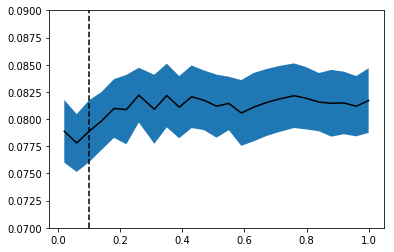

In [55]:
mean= [np.mean(graph_distances[i]) for i in p]
std = [np.std(graph_distances[i]) for i in p]
plt.plot(p, mean, 'k-')
plt.axvline(x=0.1, color='black', linestyle='--',label = "p_0 =0.1")
plt.fill_between(p, [mean[i]-std[i] for i in range(len(mean))],
                 [mean[i]+std[i] for i in range(len(mean))])
plt.ylim(0.07,0.09)
plt.show()

In [ ]:
def f(x):
    return abs(f1(x)-f2(x))

f1 = interp1d(v_ri ,cdf_zac_i)
f2 = interp1d(v_rj ,cdf_taro_i)

quad(f, 0., 1.,  epsabs = 1e-4, limit = 2000)[0]

In [117]:
tic = time.time()
G1 = r_eigenv_p0
Ni = len(G1)
G2= ws_graphs_eigenvec_dic[0.02][0]
Nj = len(ws_graphs_eigenvec_dic[0.02][0])
Mij = min(Ni,Nj)
graph_distances = []
for
    for r in range(Mij):
        v_ri = np.array(sorted(normalize_eigenv(G1[r][1])))
        v_rj = np.array(sorted(normalize_eigenv(G2[r][1])))
        f1 = interp1d(v_ri ,cdf_ind(v_ri))
        f2 = interp1d(v_rj ,cdf_ind(v_rj))
        graph_distances.append(quad(f, 0., 1.,  epsabs = 1e-4, limit = 2000)[0])
    print(sum(graph_distances)/(Mij-1))    
    tac = time.time() 
    time_minutes = (tac - tic)/60
    print(f'Evaluation took {time_minutes} minutes')

0.07792765963871605


In [57]:
A_p_list = list(A_dic.values())
hamming_distance_list = g.hamming_distance(A_p0, A_p_list)

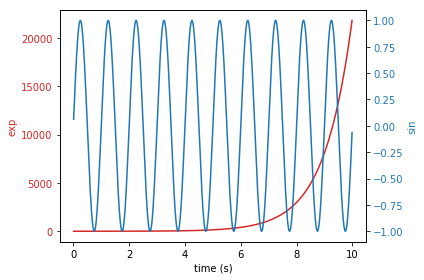

In [38]:
import numpy as np
import matplotlib.pyplot as plt



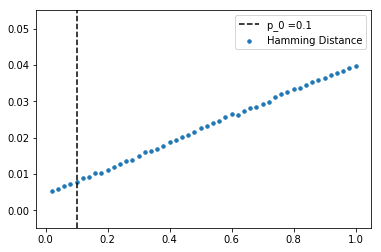

In [74]:
plt.scatter(p,hamming_distance_list, s=12,label = "Hamming Distance")
plt.xlim(-0.03, 1.05)
plt.ylim(min(hamming_distance_list)-0.01, 0.055)
plt.axvline(x=0.1, color='black', linestyle='--',label = "p_0 =0.1")
plt.legend(loc='upper right')
plt.savefig("hamming_dist")
plt.show()

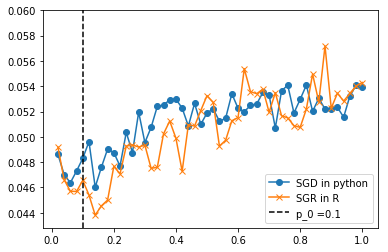

In [105]:
plt.plot(p,y, '-o',label = "SGD in python")
plt.plot(p[0:len(ry)],ry, '-x',label = "SGR in R")
#plt.xlim(-0.03, 1.05)
plt.ylim(min(ry)-0.001, 0.06)
plt.axvline(x=0.1, color='black', linestyle='--',label = "p_0 =0.1")
plt.legend(loc='lower right')
plt.savefig("sgd_dist")
plt.show()

In [132]:
vri = sorted(normalize_eigenv(r_eigenv_p0[1][1]))
vrj = sorted(normalize_eigenv(list_eigenvect[1][1][1]))
u = sorted(list(set(vri + vrj)))
vri_count = 0
vrj_count = 0

In [154]:
cdf_distance_list = []
G1 = r_eigenv_p0
G2 = list_eigenvect[1]
Ni = len(G1)
Nj = len(G2)
Mij = min(Ni, Nj)

for r in range(1, Mij):
    vri = sorted(normalize_eigenv(G1[r][1]))
    vrj = sorted(normalize_eigenv(G2[r][1]))
    u = sorted(list(set(vri + vrj)))
    
    cdf_distance = 0
    vri_count = 0
    vrj_count = 0
    
    for idx, sorted_elt in enumerate(u[1:]):
        cdf_distance += (u[idx] - u[idx - 1]) * abs((vri_count)/Ni - (vrj_count)/Nj)
        if sorted_elt in vri:
            vri_count += 1
        if sorted_elt in vrj:
            vrj_count += 1
    cdf_distance_list.append(cdf_distance)

In [158]:
tic = time.time() 
list_eigenvect = list(ws_graphs_eigenvec_dic.values())
print(f'Computing Distance Between G(p_0) and:')
graphs_dist = []
G1 = r_eigenv_p0
Ni = len(G1)
for i in range(N_graphs):
    cdf_distance_list = []
    G2 = list_eigenvect[i]
    Nj = len(G2)
    Mij = min(Ni, Nj)

    for r in range(1, Mij):
        vri = sorted(normalize_eigenv(G1[r][1]))
        vrj = sorted(normalize_eigenv(G2[r][1]))
        u = sorted(list(set(vri + vrj)))

        cdf_distance = 0
        vri_count = 0
        vrj_count = 0

        for idx, sorted_elt in enumerate(u[1:]):
            # adding rectangle area, L * W
            cdf_distance += (u[idx] - u[idx - 1]) * abs((vri_count)/Ni - (vrj_count)/Nj)
            if sorted_elt in vri:
                vri_count += 1
            if sorted_elt in vrj:
                vrj_count += 1
                
        cdf_distance_list.append(cdf_distance)
    graphs_dist.append(sum(cdf_distance_list)/(Mij-1))
    print(f'G({p[i]})= {graphs_dist[i]}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')

Computing Distance Between G(p_0) and:
G(0.02)= 0.06999108179304135
G(0.04)= 0.07264399488892445
G(0.06)= 0.0733468267493732
G(0.08)= 0.0733666835677819
G(0.1)= 0.07465365261288612
G(0.12)= 0.07531456650039446
G(0.14)= 0.0695842887836064
G(0.16)= 0.07260131773540426
G(0.18)= 0.07364357344457333
G(0.2)= 0.07634250553021932
G(0.22)= 0.07809646128371953
G(0.24)= 0.07744738643427367
G(0.26)= 0.0730391157868648
G(0.28)= 0.07855891056647846
G(0.3)= 0.07551706700166877
G(0.32)= 0.07416627173185192
G(0.34)= 0.07506834858891795
G(0.36)= 0.0770276368089571
G(0.38)= 0.07835086070352829
G(0.4)= 0.08071414461001324
G(0.42)= 0.07447657131566433
G(0.44)= 0.0746099118914367
G(0.46)= 0.07604453552827337
G(0.48)= 0.07583530437625102
G(0.5)= 0.07672855580655501
G(0.52)= 0.07579536703251448
G(0.54)= 0.07557832497969907
G(0.56)= 0.07684003378296422
G(0.58)= 0.07737399675439058
G(0.6)= 0.07389618490119389
G(0.62)= 0.07576315244191682
G(0.64)= 0.07738597983707027
G(0.66)= 0.07556872643453723
G(0.68)= 0.07901

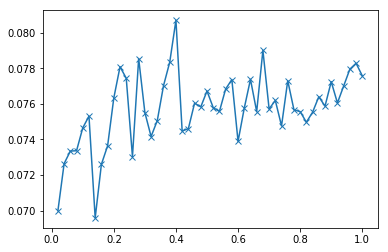

In [162]:
plt.plot(p,graphs_dist, "-x")
plt.show()

In [142]:
vri = sorted(normalize_eigenv(r_eigenv_p0[1][1]))
vrj = sorted(normalize_eigenv(list_eigenvect[1][1][1]))
u = sorted(list(set(vri + vrj)))

Ni = len(vri)
Nj = len(vrj)
cdf_distance = 0
vri_count = 0
vrj_count = 0

for idx, sorted_elt in enumerate(u[1:]):
    cdf_distance += (u[idx] - u[idx - 1]) * abs((vri_count)/Ni - (vrj_count)/Nj)
    if sorted_elt in vri:
        vri_count += 1
    if sorted_elt in vrj:
        vrj_count += 1

In [143]:
cdf_distance

0.1419265163104079

In [136]:
vri_count

499

In [129]:
cdf_distance

0.1419265163104079

In [16]:
tic = time.time() 
list_eigenvect = list(ws_graphs_eigenvec_dic.values())
graph_dist = np.zeros((N_graphs))
print(f'Computing Distance Between G(p_0) and:')
for i in range(N_graphs):
    _, graph_dist_ = g.graphs_kruglov_distance(r_eigenv_p0, list_eigenvect[i])
    graph_dist[i] = graph_dist_
    print(f'G({p[i]})= {graph_dist_}')
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Evaluation took {time_minutes} minutes')

Computing Distance Between G(p_0) and:
G(0.02)= 0.04862144564288087
G(0.04)= 0.04701960385885067
G(0.06)= 0.046365517960577154
G(0.08)= 0.047299917073022175
G(0.1)= 0.04829815962582582
G(0.12)= 0.0496215954028084
G(0.14)= 0.04602206368141749
G(0.16)= 0.04759797966422197
G(0.18)= 0.04903434917543602
G(0.2)= 0.048750612805952304
G(0.22)= 0.047691149860475415
G(0.24)= 0.05034646389394066
G(0.26)= 0.04876143778903771


/Users/user/Desktop/MSM/96-thesis.2/00-code/complex_networks/graphs.py:54: IntegrationWarning: The maximum number of subdivisions (2000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=(N_i, N_j, v_ri, v_rj),


G(0.28)= 0.05195169632830836
G(0.3)= 0.0495475259956044
G(0.32)= 0.05074499939580792
G(0.34)= 0.05240734191143738
G(0.36)= 0.05250778627094094
G(0.38)= 0.05293202833956598
G(0.4)= 0.0529825826131088
G(0.42)= 0.0522683184923844
G(0.44)= 0.05085723379334087
G(0.46)= 0.05264488064113079
G(0.48)= 0.05099378787051196
G(0.5)= 0.05188318126370059
G(0.52)= 0.05221248303638931
G(0.54)= 0.05123599110858558
G(0.56)= 0.05146750854017662
G(0.58)= 0.053407001916809214
G(0.6)= 0.052256810372153614
G(0.62)= 0.05199318372191144
G(0.64)= 0.05247786126620665
G(0.66)= 0.052598466264300175
G(0.68)= 0.05351160214855812
G(0.7)= 0.053308817703515615
G(0.72)= 0.050697427013846
G(0.74)= 0.05363516716793881
G(0.76)= 0.05408262473252118
G(0.78)= 0.051887518751416103
G(0.8)= 0.05296432240295614
G(0.82)= 0.05409502463091488
G(0.84)= 0.05201740492704781
G(0.86)= 0.05304444691404587
G(0.88)= 0.05219412008059043
G(0.9)= 0.05222542191046715
G(0.92)= 0.052327371865460263
G(0.94)= 0.05155713970468431
G(0.96)= 0.053222409

NameError: name 'tic' is not defined

In [59]:
def cdf_(y, v):
    tr = y - v
    return len(tr[tr>=0]) / len(v)

def graphs_kruglov_distance(eig_Gi, eig_Gj):
    signs=[-1,1]
    N_i= len(eig_Gi)
    N_j= len(eig_Gj)
    Mij = min(N_i, N_j)
    eigenvect_dist = np.zeros((Mij - 1))
    for r in range(1, Mij):
        temp=[]
        for  sign_s in signs:
            for sign_l in signs:
                v_ri = normalize_eigenv(sign_s * eig_Gi[r][1])
                v_rj = normalize_eigenv(sign_l * eig_Gj[r][1])
                temp.append(kruglov_distance(v_ri,v_rj))
        eigenvect_dist[r - 1] = min(temp)
    return(eigenvect_dist, np.sum(eigenvect_dist) / (Mij - 1)) 

def kruglov_distance(v_ri,v_rj):
    return (
        quad(
            integrand_kd, 0., 1., 
            epsabs = 1e-4, limit = 2000, 
            args=(v_ri, v_rj),
        )[0]
    )

def normalize_eigenv(eigenvc):
    return(
        (eigenvc - min(eigenvc)) / (max(eigenvc) - min(eigenvc))
    )

def integrand_kd(y, v_ri, v_rj):
    return np.abs((np.sum(y - v_ri >= 0) / len(v_ri)) - (np.sum(y - v_rj >= 0) / len(v_rj)))

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [60]:
list_eigenvect = list(ws_graphs_eigenvec_dic.values())
dr, test= graphs_kruglov_distance(r_eigenv_p0, list_eigenvect[0])

In [16]:
dr, test= graphs_kruglov_distance(r_eigenv_p0, list_eigenvect[0])

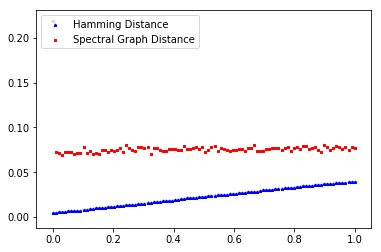

In [16]:
plt.scatter(p,hamming_distance_list,c='b', marker='*', s=8,label='Hamming Distance')
plt.scatter(p,graph_dist,c='r', marker='s',s=8, label='Spectral Graph Distance')
plt.legend(loc='upper left')
plt.show()

In [19]:
max(graph_dist)

0.21951686465717973

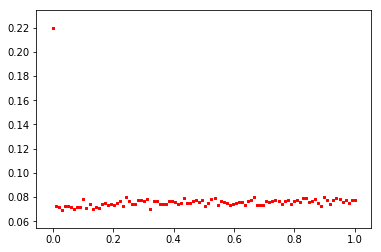

In [20]:
plt.scatter(p,graph_dist,c='r', marker='s',s=8, label='Spectral Graph Distance')
plt.show()